In [2]:
%cd /home/juriostegui/work/Latent-Imagination

/home/juriostegui/work/Latent-Imagination


## settings

In [3]:
!python infra/commands/get_cfg.py --train

dataset:
  name: mnist
  data_dir: /home/juriostegui/work/Latent-Imagination/data
  batch_size: 256
  num_workers: 4
  pin_memory: true
  val_split: 0.1
  sun_resize: 64
  sun_to_grayscale: true
  split_seed: 42
model:
  type: vae_mlp
  z_dim: 15
  lr: 0.001
  beta: 2.0
  weight_decay: 0.0
  encoder_hidden:
  - 512
  - 256
  decoder_hidden:
  - 256
  - 512
train:
  epochs: 225
  save_dir: /home/juriostegui/work/Latent-Imagination/runs/default
  use_amp: false
  early_stopping: true
  patience: 25
  save_top_k: 5
  grad_clip: 1.0
  monitor_val_loss: true
  deterministic: false
  log_every_n_steps: 50
  use_gpu: true



## dashboard

In [4]:
%load_ext tensorboard
%reload_ext tensorboard
%tensorboard --logdir /runs # Assuming 'runs' is where your logs are

## Train

In [5]:
#get training settings
!python run.py get_cfg config=train_vae_conv

dataset:
  name: mnist
  batch_size: 1024
  num_workers: 0
model:
  type: vae_conv
  beta: 0.0025
train:
  epochs: 225
  save_dir: ./runs/vae_conv
  use_amp: true
  early_stopping: true
  patience: 30
  save_top_k: 3
  grad_clip: 1.0



In [6]:
#get model overview
!python run.py get_model configs/model/vae_conv.yaml --which decoder --tools torchinfo torchviz

/home/juriostegui/work/env/lib/python3.11/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: '/home/juriostegui/work/env/lib/python3.11/site-packages/torchvision/image.so: undefined symbol: _ZN3c106detail23torchInternalAssertFailEPKcS2_jS2_RKSs'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(
Layer (type:depth-idx)                   Output Shape              Param #
ConvDecoder                              [1, 1, 28, 28]            --
├─Linear: 1-1                            [1, 3136]                 50,176
├─Sequential: 1-2                        [1, 1, 28, 28]            --
│    └─Unflatten: 2-1                    [1, 64, 7, 7]             --
│    └─ConvTranspose2d: 2-2              [1, 32, 14, 14]           32,800
│    └─ReLU: 2-3   

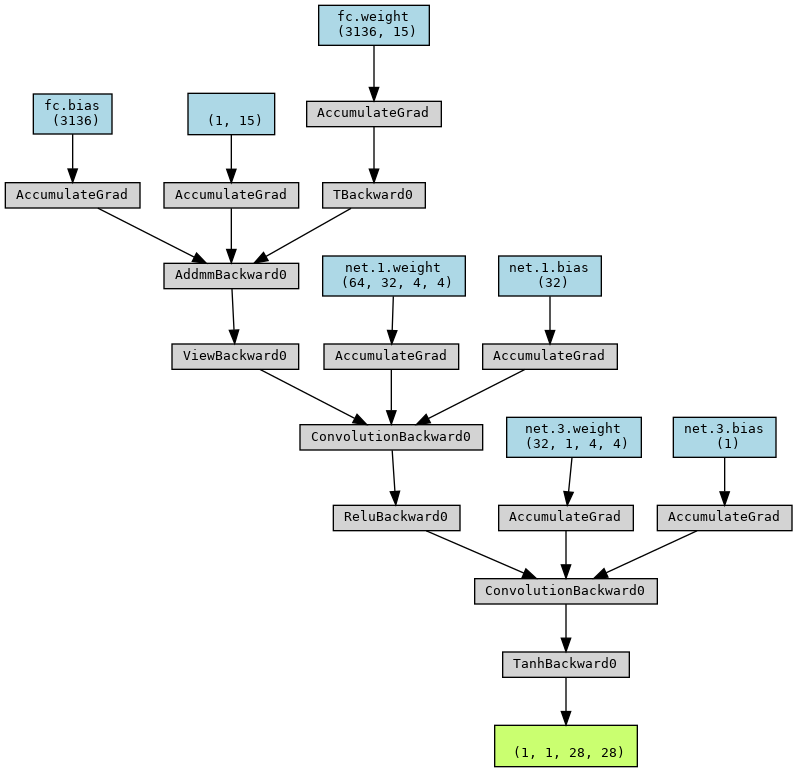

Displayed image: runs/decoder_visuals/torchviz_decoder.png


In [7]:
from IPython.display import display, Image

image_path = 'runs/decoder_visuals/torchviz_decoder.png'

try:
    display(Image(image_path))
    print(f"Displayed image: {image_path}")
except FileNotFoundError:
    print(f"Error: Image file not found at {image_path}")
except Exception as e:
    print(f"An error occurred while displaying the image: {e}")

In [8]:
#run training
!python run.py train  --config-name=train_vae_conv # train.epochs=1

/home/juriostegui/work/env/lib/python3.11/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: '/home/juriostegui/work/env/lib/python3.11/site-packages/torchvision/image.so: undefined symbol: _ZN3c106detail23torchInternalAssertFailEPKcS2_jS2_RKSs'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(
/home/juriostegui/work/env/lib/python3.11/site-packages/lightning_fabric/connector.py:571: `precision=16` is supported for historical reasons but its usage is discouraged. Please set your precision to 16-mixed instead!
Using 16bit Automatic Mixed Precision (AMP)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/home/juriostegui/work/env/lib/